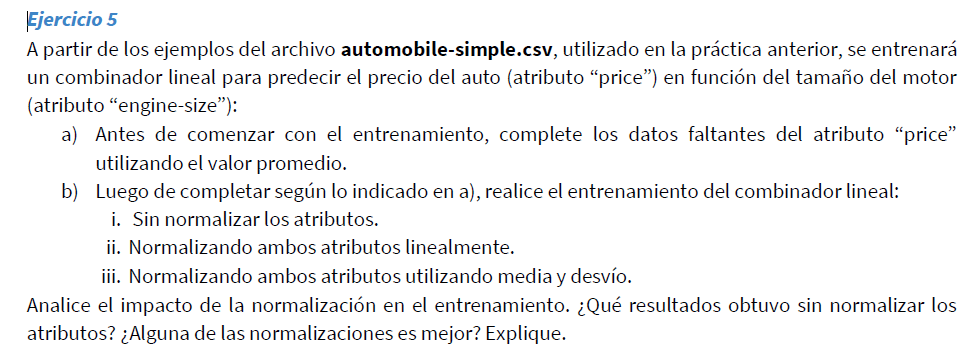

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### **Info**

In [2]:
import pandas as pd
import chardet

nombre_archivo = DATOS_DIR + 'automobile-simple.csv'

with open(nombre_archivo, 'rb') as  f:
    result = chardet.detect(f.read())

df = pd.read_csv(nombre_archivo, encoding=result["encoding"])
display(df)
df.info()
df.nunique()

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


make             22
fuel-type         2
num-of-doors      2
body-style        5
curb-weight     171
engine-size      44
horsepower       59
city-mpg         29
highway-mpg      30
price           186
volume           97
eco-rating      190
dtype: int64

### **B)**

In [4]:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64

In [5]:
meanPrice = df['price'].mean()
meanPrice

13207.129353233831

In [6]:
df['price'] = df['price'].fillna(meanPrice)
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

### **B)**

In [8]:
# Imprime matriz de correclacion
corr = df[['engine-size', 'price']].corr()
print(corr)

             engine-size     price
engine-size     1.000000  0.863075
price           0.863075  1.000000


### **Sin normalizar atributos**

In [9]:
import numpy as np
# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

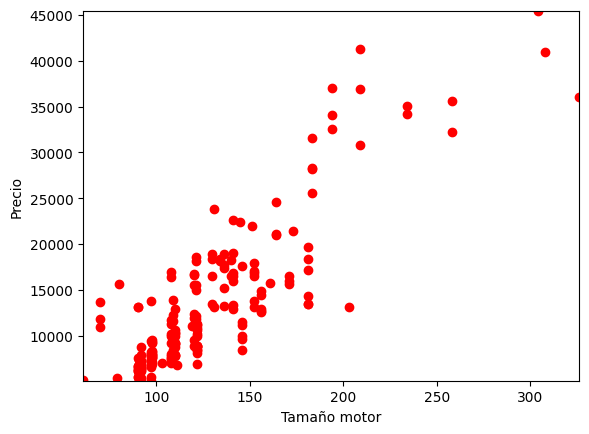

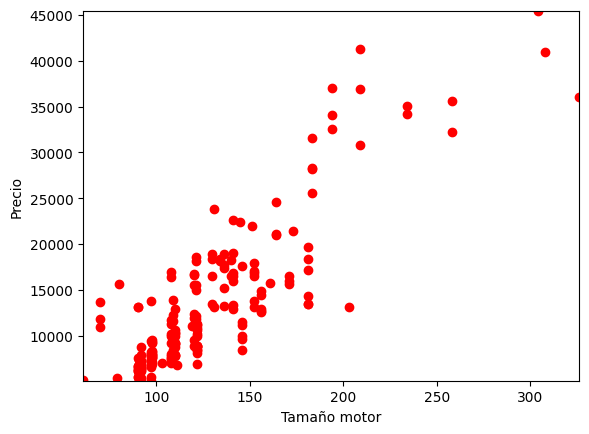

In [12]:
from ClassNeuronaLineal import NeuronaLineal
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=50, cotaE=10e-05, draw=1, title=['Tamaño motor', 'Precio'])
modelo.fit(X, Y)

In [13]:
# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))

Errores:
  0 => nan


In [14]:
tamaño_motor = 130 #quiero predecir cual es el precio de un motor de 130
entrada = np.array([tamaño_motor]).reshape((-1,1)) #transformo la entrada
prediccion = modelo.predict( entrada )
print (f'El precio predicho para el motor de 130 es de {prediccion}')

El precio predicho para el motor de 130 es de [nan]


### **Normalizo Linealmente**

In [19]:
# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data_scaler , targer_scaler= MinMaxScaler(), MinMaxScaler()
X = data_scaler.fit_transform(X)
Y = targer_scaler.fit_transform(Y)

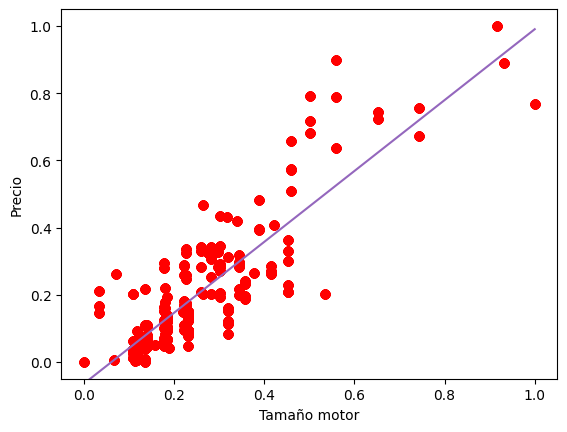

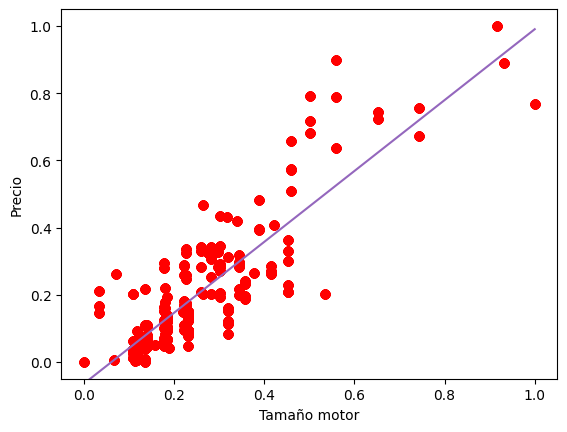

In [22]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001, draw=1, title=['Tamaño motor', 'Precio'])
modelo.fit(X, Y)

In [23]:
# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))

Errores:
  0 => 11.436458
  1 => 7.906143
  2 => 6.883833
  3 => 6.043067
  4 => 5.346387
  5 => 4.769003
  6 => 4.290457
  7 => 3.893804
  8 => 3.565004
  9 => 3.292429
 10 => 3.066444
 11 => 2.879067
 12 => 2.723686
 13 => 2.594822
 14 => 2.487937
 15 => 2.399268
 16 => 2.325701
 17 => 2.264653
 18 => 2.213983
 19 => 2.171920
 20 => 2.136994
 21 => 2.107987
 22 => 2.083888
 23 => 2.063863
 24 => 2.047217
 25 => 2.033375
 26 => 2.021861
 27 => 2.012279
 28 => 2.004301
 29 => 1.997656
 30 => 1.992118
 31 => 1.987500
 32 => 1.983647
 33 => 1.980430
 34 => 1.977742
 35 => 1.975495
 36 => 1.973614
 37 => 1.972038
 38 => 1.970717
 39 => 1.969608
 40 => 1.968676
 41 => 1.967892
 42 => 1.967232
 43 => 1.966675
 44 => 1.966205
 45 => 1.965807
 46 => 1.965470
 47 => 1.965184
 48 => 1.964941
 49 => 1.964733
 50 => 1.964557
 51 => 1.964405
 52 => 1.964276
 53 => 1.964165
 54 => 1.964069


In [33]:
tamaño_motor = 130 #quiero predecir cual es el precio de un motor de 130
entrada = np.array([tamaño_motor]).reshape((-1,1)) #transformo la entrada
entrada = data_scaler.transform(entrada) #revierto la normalizacion
prediccion = modelo.predict( entrada )
prediccion = targer_scaler.inverse_transform([prediccion])
print (f'El precio predicho para el motor de 130 es de {prediccion[0,0]}')


El precio predicho para el motor de 130 es de 13569.138295629551


### **Normalizo con media y desvio**

In [34]:
# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

In [35]:
data_scaler, targer_scaler = StandardScaler(), StandardScaler()
X = data_scaler.fit_transform(X)
Y = targer_scaler.fit_transform(Y)

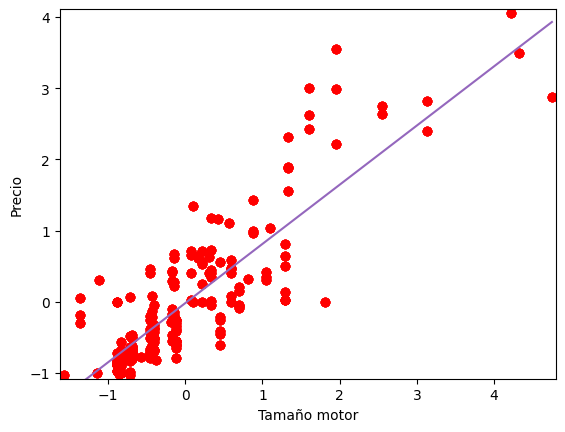

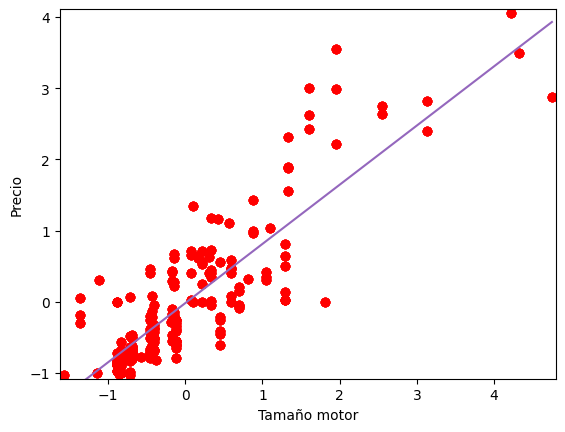

In [37]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001, draw=1, title=['Tamaño motor', 'Precio'])
modelo.fit(X, Y)

In [38]:
# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))

Errores:
  0 => 67.864618
  1 => 53.185470
  2 => 53.127045
  3 => 53.126299
  4 => 53.126289


In [40]:
tamaño_motor = 130

entrada = np.array([tamaño_motor]).reshape((-1,1))
entrada = data_scaler.transform(entrada)

prediccion = modelo.predict( entrada )
prediccion = targer_scaler.inverse_transform([prediccion])
print (f'El precio predicho para el motor de 130 es de {prediccion[0,0]}')

El precio predicho para el motor de 130 es de 13594.904251620237


### **Anilisis Final

In [41]:
promedio130 = df[ df['engine-size'] == 130 ] ['price'].mean()
print (f'El precio promedio para motor de 130 es de {promedio130}')
max130 = df[ df['engine-size'] == 130 ] ['price'].max()
print (f'El precio maximo para motor de 130 es de {max130}')
min130 = df[ df['engine-size'] == 130 ] ['price'].min()
print (f'El precio minimo para motor de 130 es de {min130}')

El precio promedio para motor de 130 es de 16841.25
El precio maximo para motor de 130 es de 18950.0
El precio minimo para motor de 130 es de 13495.0


    1) sin normalizar no anda
    2) normalizando linealmente da un precio de 13569.2897
    3) normalizando con media y desvio da un precio de 13594.9042
***Con media y desvio se entrena mas rapido, con menos errores y funciona igual de bien que normalizando linealmente***